# New York City Green Taxi Tip Prediction 
## Junkai Hu, Jingxi Chen, Amartya Banerjee


## Introduction:
From the perspective of a data scientist, when one hears about New York, one can almost vizualize the vast array of data available from financial sectors of Wall Street to historic collections of data in The Metropolitan Museum of Art.
In this project, we will be focusing on a rather different form or set of data. We will try explore the world of data from the perspective of an everyday Boro cab driver. We will be looking at different features ranging from trip time and distance travelled and its effects on tips received by a cab driver. An hypothesis test on whether the time of the day effects the tip % for a cab driver will also be carried out.  Moreover, we will also vizualize the density of pick-ups locations of passengers of New York. This will be an inquiry into the lifeline of one of the most bustling cities of America.

For more information, read: 
https://en.wikipedia.org/wiki/Boro_taxi

In this project, we will perform stepwise data analysis on the dataset and try to explore the following things:
1. Collect the data and clean it.
2. Check the influence of payment type on tip report percentage.
3. Investigate the passenger tipping behavior by check the tip amount and tip percentage.
4. Study the correlation between tip amount and taxi time/date.
5. Analysis the trip distance and tip percentage.
6. Explore and visualize relationship between the pickup/drop-off location and tip percentage.
7. Calculate the average speed and study its influence on tip percentage.
8. Tidying and modeling the data to generalize the pattern of data 


## Required Tools

The following libraries are required for this project:
1. pandas
2. numpy
3. matplotlib
4. datetime
5. collections
6. seaborn
7. folium

In [118]:
!pip install folium

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime
import collections
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Part 1 Data Collection

First we can find the direct link for the October 2017 NYC green taxi data by reading the html website source code (https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv). 

This data is collected from New York City Taxi and Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml). 

Then we load the csv file into the panda dataframe. 

The data contains 1.6 M rows and 21 columns.

In [120]:
year, month = 2015, 12
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv" % (year,month)
raw_data = pd.read_csv(url)

In [121]:
raw_data.sample(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
172539,2,2015-12-04 15:44:59,2015-12-04 15:58:16,N,1,-73.964470,40.803326,-73.972755,40.790733,1,...,10.0,0.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1.0
533410,2,2015-12-11 12:48:42,2015-12-11 12:56:04,N,1,-73.952629,40.651829,-73.962471,40.671265,1,...,7.5,0.0,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0
1391162,2,2015-12-27 06:15:42,2015-12-27 06:22:44,N,1,-73.957649,40.722157,-73.952744,40.706631,1,...,7.5,0.0,0.5,1.66,0.0,NaN,0.3,9.96,1,1.0
975830,1,2015-12-19 01:53:34,2015-12-19 02:06:17,N,1,-73.987518,40.691708,-73.949509,40.675179,1,...,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,2,1.0
738188,2,2015-12-14 20:21:48,2015-12-14 20:34:39,N,1,-73.941238,40.711174,-73.958847,40.687569,1,...,11.0,0.5,0.5,2.46,0.0,NaN,0.3,14.76,1,1.0


In [122]:
print("Number of rows: ", raw_data.shape[0],"\nNumber of columns: ", raw_data.shape[1])

Number of rows:  1608290 
Number of columns:  21


It contains a variety of information, such as pickup/drop-off date, time, and location, trip distance, fair amount in different subjects, and payment types.

The detailed explanation for the columns can be found at 
(http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf)

In [123]:
raw_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

## Part 2 Data Processing


### 2.1 Invalide trip distance, location, and fare amount

After play around with data for a while, we found some flaws in the data that might need to be cleaned. Here are some examples that we can display.

In [124]:
df = raw_data.copy()

In [125]:
print ("The number of zero trip distance is:", df[df['Trip_distance'] == 0].shape[0])
print ("The percentage of zero trip distance is: %0.2f %%" %(df[df['Trip_distance'] == 0].shape[0] * 100.0/df.shape[0]))
print ("The number of negetive payment is:", df[df['Total_amount'] <= 0].shape[0])
print ("The percentage of negetive payment is: %0.2f %%" %(df[df['Total_amount'] <= 0].shape[0] * 100.0/df.shape[0]))
print ("The number of invalid pickup/dropoff location is:", df[(df['Pickup_longitude'] == 0) | (df['Pickup_latitude'] == 0)
    | (df['Dropoff_longitude'] == 0) | (df['Dropoff_latitude'] == 0)].shape[0])
print ("The percentage of invalid pickup/dropoff location is: %0.2f %%" %(df[(df['Pickup_longitude'] == 0)
    | (df['Pickup_latitude'] == 0) | (df['Dropoff_longitude'] == 0) | (df['Dropoff_latitude'] == 0)].shape[0] * 100.0/df.shape[0]))
print ("The total number of invalid entry is:", df[(df['Trip_distance'] == 0) | (df['Total_amount'] <= 0) | (df['Pickup_longitude'] == 0) 
    | (df['Pickup_latitude'] == 0) | (df['Dropoff_longitude'] == 0) | (df['Dropoff_latitude'] == 0)].shape[0])
print ("The percentage of total number of invalid entry is: %0.2f %%" %(df[(df['Trip_distance'] == 0) | (df['Total_amount'] <= 0)
    | (df['Pickup_longitude'] == 0) | (df['Pickup_latitude'] == 0) | (df['Dropoff_longitude'] == 0) | (df['Dropoff_latitude'] == 0)].shape[0] 
    * 100.0/df.shape[0]))

The number of zero trip distance is: 22041
The percentage of zero trip distance is: 1.37 %
The number of negetive payment is: 7289
The percentage of negetive payment is: 0.45 %
The number of invalid pickup/dropoff location is: 3835
The percentage of invalid pickup/dropoff location is: 0.24 %
The total number of invalid entry is: 29629
The percentage of total number of invalid entry is: 1.84 %


This corresponds to about 1.84% of the total data. Since this project is majorly studying the relationship between tip amount and fare amount, trip distance, and location. We can remove it without influencing the general trend of the data.

Here we remove those invalid rows, and change the pickup/dropoff information into datetime format.

In [126]:
df = df[(df['Trip_distance'] > 0) | (df['Total_amount'] > 0) | (df['Pickup_longitude'] > 0) 
    | (df['Pickup_latitude'] > 0) | (df['Dropoff_longitude'] > 0) | (df['Dropoff_latitude'] > 0)]
df.shape

(1608117, 21)

In [127]:
datetime_cols = df.columns[1:3]
format_dt = "%Y-%m-%dT%H:%M:%S"
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format = format_dt)
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                       float64
dtype: object

From the log file, it seems that we only deleted a very small amount of data. The data is relatively clean. 

### 2.2 Influence of Payment type

In [128]:
print ("The total number of records is:", df.shape[0])
print ("The total number of zero tip is:", df[df['Tip_amount'] == 0.0].shape[0])
ratio = df[df['Tip_amount'] == 0.0].shape[0]/(0.0 + df.shape[0])
print ("The percentage of tip that is zero is: ", "{0:.2f}%".format(ratio * 100))

The total number of records is: 1608117
The total number of zero tip is: 952599
The percentage of tip that is zero is:  59.24%


Nearly 3 out of 5 trips did not pay tips, which is not reasonable based on our experience. Our guess is that the cash payers paid tips by cash and drivers did not report it. The following is the analysis of different payment types

In [129]:
tip0 = collections.Counter(df[df['Tip_amount'] == 0.0]['Payment_type'])
tipnot0 = collections.Counter(df[df['Tip_amount'] != 0.0]['Payment_type'])
name = {1: "credit card", 2: "Cash",3: "No charge",4: "Disputed Trip",5: "Unknown"}
print ("The breakdown of the trips by payment codes:")
for key in tip0:
    print ("When the payment code is ", "{:13s}".format(name[key]),',\
    the number of zero tip is: ', "{:6d}".format(tip0[key]),'. The number of non-zero tip is: ', tipnot0[key])

The breakdown of the trips by payment codes:
When the payment code is  Cash          ,    the number of zero tip is:  828368 . The number of non-zero tip is:  0
When the payment code is  credit card   ,    the number of zero tip is:  112805 . The number of non-zero tip is:  655487
When the payment code is  Disputed Trip ,    the number of zero tip is:    4977 . The number of non-zero tip is:  12
When the payment code is  No charge     ,    the number of zero tip is:    6360 . The number of non-zero tip is:  19
When the payment code is  Unknown       ,    the number of zero tip is:      89 . The number of non-zero tip is:  0


Our hypothesis is true. All of cash payers either did not pay tips or the drivers did not report them. This agrees with the description of the dataset (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf). The tip-amount field "is automatically populated for credit card tips. Cash tips are not included.". Notice that there are about 14.7% credit card payers who did not pay tips, which makes sense. In addition, the payment code of Disputed Trip, No charge, and Unknown also have very large percentage of zero tip (>99.7%), since they may also use cash as payment type, we will also get rid of these data as well. In conclusion, the only payment type that is trackable is the credit card users, so we will only analysis these specific data.

In [130]:
df = df[(df['Payment_type'] == 1)]
df.shape

(768292, 21)

## Part 3 Exploratory analysis & Data viz

Our hypothesis is that the tip percentage is not only depended on the trip fare, but also related to the trip date, trip time, trip origin/destination. Therefore, in this part, we will first analysis these variables.

First we will create a new column hour based on pickup day, time, and the day of week (Monday is 0, Sunday is 6). Then we can do some aggregation like mean and median distance by hour. 

In [131]:
df['day'] = df['lpep_pickup_datetime'].apply(lambda x: x.day)
df['hour'] = df['lpep_pickup_datetime'].apply(lambda x: x.hour)
df['weekday'] = df['lpep_pickup_datetime'].apply(lambda x: x.weekday())

In [132]:
df[['lpep_pickup_datetime', 'hour', 'day', 'weekday']].sample(10)

,lpep_pickup_datetime,hour,day,weekday
443292,2015-12-09 17:22:48,17,9,2
697721,2015-12-13 23:03:11,23,13,6
567106,2015-12-11 22:52:35,22,11,4
829942,2015-12-16 19:17:58,19,16,2
659040,2015-12-13 04:53:53,4,13,6
1366165,2015-12-26 18:39:09,18,26,5
318188,2015-12-06 19:06:01,19,6,6
523456,2015-12-11 08:32:17,8,11,4
411882,2015-12-08 22:19:35,22,8,1
487475,2015-12-10 15:13:45,15,10,3


### 3.1 Build a derived variable for tip as a percentage of the total fare.

Next we will create a column "Tip percentage" which is the percentage of tip amount in total amount (including tip). For example, if the total fare is 100 dollars (including the tip) and the tip is 20 dollars. This percentage will give us 20.

In [133]:
df['total_without_tip'] = df['Total_amount'] - df['Tip_amount']
df['Tip_percentage'] = df['Tip_amount'] * 100 /df['total_without_tip']

In [134]:
df['Tip_percentage'].sample(10)

856680     20.000000
91968      25.000000
50807      20.000000
1185775    20.000000
997490      0.000000
1187624    24.657534
370775     19.942197
1509828    25.000000
549017     20.000000
908815      0.000000
Name: Tip_percentage, dtype: float64

From above sample, it seems that the tip percentage is more likely to be whole integer number, for example, 20% and 25%. In the next step we will build a histogram and check the distribution of tip percentage.

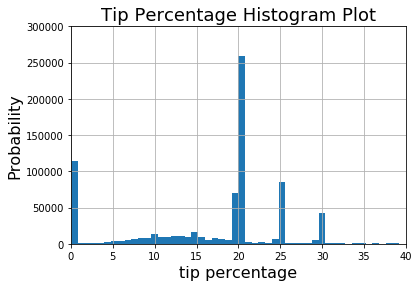

In [135]:
temp = df['Tip_percentage'].dropna()
temp = temp[temp < 40]
plt.hist(temp, bins = 50)
plt.xlabel('tip percentage', fontsize =16)
plt.ylabel('Probability',fontsize =16)
plt.title('Tip Percentage Histogram Plot',fontsize =18)
plt.axis([0, 40, 0, 300000])
plt.grid(True)
plt.savefig("figs/histogram_tip.png",dpi=100)
plt.show()
del temp

Except the expected 0% tip percentage, we also noticed huge peaks of modes in 20% tip, 25% tip and 30% tip. This is because passengers can press one of three values when they pay the driver.

Next question is: What is the relative likelihood that passengers would press one of these three ratios? 

In [136]:
total = df[df['Tip_amount'] != 0].shape[0]
tip20 = df[abs(df['Tip_percentage'] - 20.0) < 1].shape[0]  # 25% tip
tip25 = df[abs(df['Tip_percentage'] - 25.0) < 1].shape[0]   # 20% tip
tip30 = df[abs(df['Tip_percentage'] - 30.0) < 1].shape[0]  # 30% tip
print ("The total number of riders who payed tips are: ", total)
print ("The total number of riders who payed 20% tips are: ", tip20)
print ("The total number of riders who payed 25% tips are: ", tip25)
print ("The total number of riders who payed 30% tips are: ", tip30)
print ("The percentage of riders who used keypad to pay three three tips are: ","{0:.2f}%".format((tip20 + tip25 + tip30) /(df.shape[0] / 100.0)))

The total number of riders who payed tips are:  655487
The total number of riders who payed 20% tips are:  331341
The total number of riders who payed 25% tips are:  92687
The total number of riders who payed 30% tips are:  48191
The percentage of riders who used keypad to pay three three tips are:  61.46%


Therefore the ratios is roughly: 7:2:1 (20% : 25% : 30% tip), about 61.5% people will provide tip use these three values.

Are there any modes on the tip amount? Let us find it out.

C:\Users\Amartya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


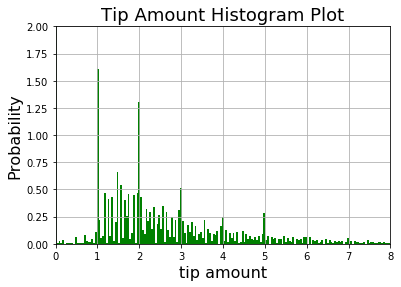

In [137]:
x = df[df['Tip_amount'] < 10]['Tip_amount']
n, bins, patches = plt.hist(x, 300, normed=1, facecolor='green')
plt.xlabel('tip amount', fontsize =16)
plt.ylabel('Probability', fontsize = 16)
plt.title('Tip Amount Histogram Plot',fontsize =18)
plt.axis([0, 8, 0, 2])
plt.grid(True)
plt.savefig("figs/tip_dollar.png",dpi =100)
del x

Notice there are clear peaks at 1, 2, 3, 4, and 5 dollars. How many are they?

In [138]:
tip1 = df[df['Tip_amount'] == 1.0].shape[0]   # 1 dollar tip
print ("The number of riders who paid 1 dollar as tip is: ", tip1)
tip2 = df[df['Tip_amount'] == 2.0].shape[0]   # 2 dollar tip
print ("The number of riders who paid 2 dollar as tip is: ", tip2)
tip3 = df[df['Tip_amount'] == 3.0].shape[0]   # 3 dollar tip
print ("The number of riders who paid 3 dollar as tip is: ", tip3)
tip4 = df[df['Tip_amount'] == 4.0].shape[0]   # 4 dollar tip
print ("The number of riders who paid 4 dollar as tip is: ", tip4)
tip5 = df[df['Tip_amount'] == 5.0].shape[0]   # 5 dollar tip
print ("The number of riders who paid 5 dollar as tip is: ", tip5)

The number of riders who paid 1 dollar as tip is:  52134
The number of riders who paid 2 dollar as tip is:  42324
The number of riders who paid 3 dollar as tip is:  16653
The number of riders who paid 4 dollar as tip is:  7324
The number of riders who paid 5 dollar as tip is:  9030


In [139]:
print ("The percentage of riders who tip integer amount is: ","{0:.2f}%".format((tip1 + tip2 + tip3 + tip4 + tip5) /(df.shape[0] / 100.0)))

The percentage of riders who tip integer amount is:  16.59%


The general picture is: 14.7% credit card papers either do not pay tips or the drivers took cash and did not report them. 61.5 % choose to press the button to pay 20%, 25% or 30% ( the ratio is roughly 7:2:1). Another 16.6 % will pay a rounded integer dollar (1, 2, 3, 4, 5 or 6 dollars). The majority paid 1 or 2 dollars. The rest of them (about 7%) pay the tip to make the total amount to an integer. This is an example of missing data since people fail to report the amount of tips paid. (Missing not at random to be precise)

### 3.2 Pickup time.

In general, the tip percentage in the late night should be larger than in the noon, we will evaluate this hypothesis here. This is our Null Hypothesis.

In [140]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

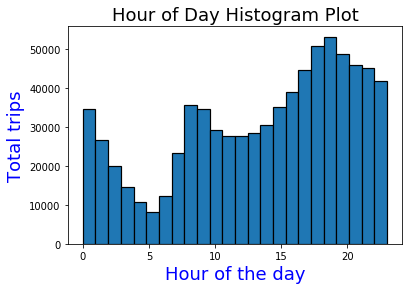

In [141]:
plt.hist(df['hour'], bins = 24, edgecolor='black', linewidth=1.2) 
plt.xlabel('Hour of the day', fontsize = 18, color ="b")
plt.ylabel('Total trips', fontsize = 18, color = "b")
plt.title('Hour of Day Histogram Plot',fontsize =18)
plt.savefig("figs/by_hour_trip_hist.png", dpi = 100)
plt.show()

From the figure we can see the trafic varies in the hour of day. There is a peak between 5 pm and 8 pm, which is the get off-work time. Interestingly, there is no corresponding peak in the morning. 5 am is a trough in the graph.

In the next step, we will plot and compare the tip percentage at different time of the day, different day in a week and month. And tried to find some clues from them.

C:\Users\Amartya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


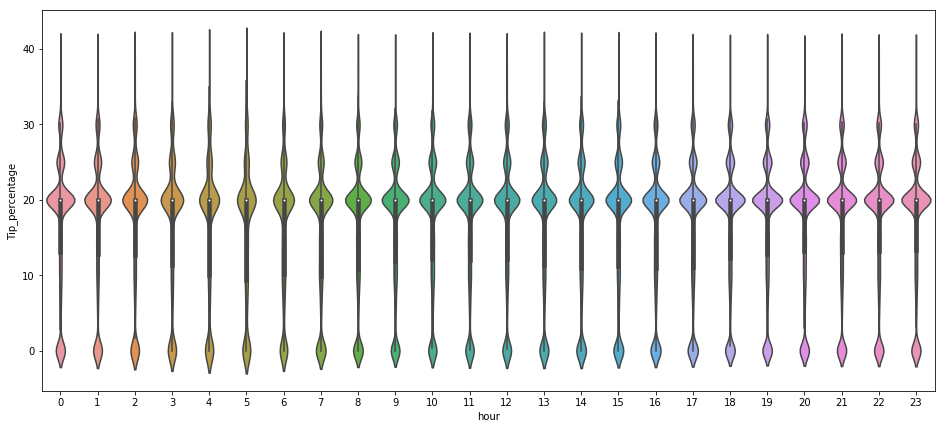

In [142]:
temp = df[df['Tip_percentage'] < 40]
plt.figure(figsize=(16,7))
sns.violinplot(x='hour',y='Tip_percentage',data=temp)
plt.savefig("figs/tip%_hour.png", dpi = 100)
del temp

C:\Users\Amartya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


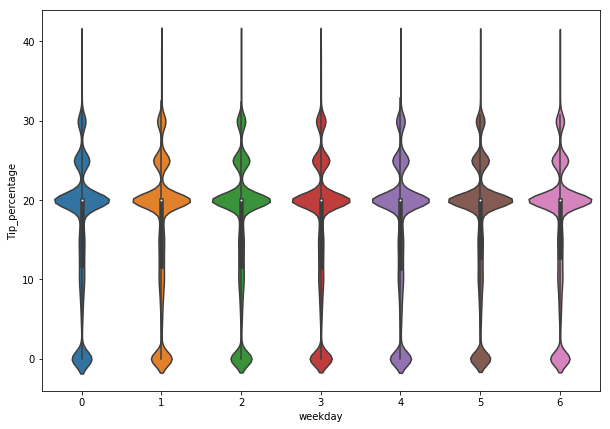

In [143]:
temp = df[df['Tip_percentage'] < 40]
plt.figure(figsize=(10,7))
sns.violinplot(x='weekday',y='Tip_percentage',data=temp)
plt.savefig("figs/tip%_weekday.png", dpi = 100)
del temp

C:\Users\Amartya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


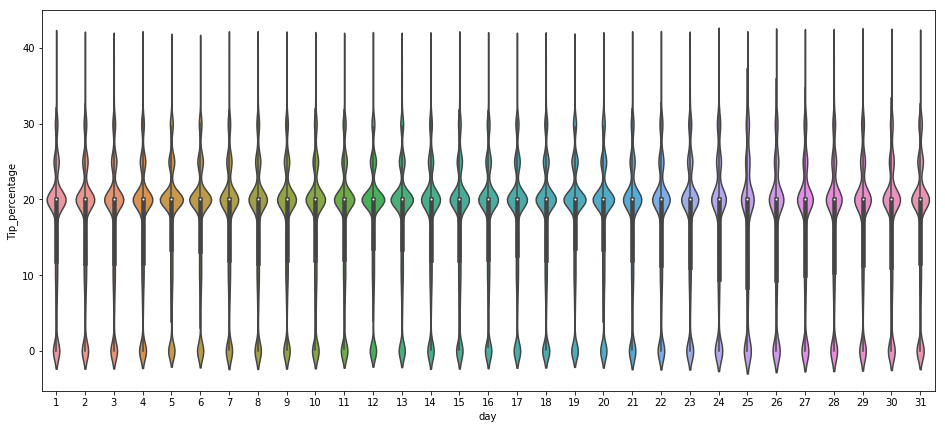

In [144]:
temp = df[df['Tip_percentage'] < 40]
plt.figure(figsize=(16,7))
sns.violinplot(x='day',y='Tip_percentage',data=temp)
plt.savefig("figs/tip%_weekday.png", dpi = 100)
del temp

From the figures, unlike what we expect, the tip percentage is neither related with hour of the day, nor related with the day in week. Even during Christmas and New Year's Eve, the tip percentage is similar as in normal days.

### 3.3 Trip distance.

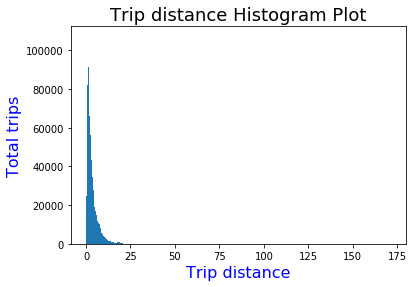

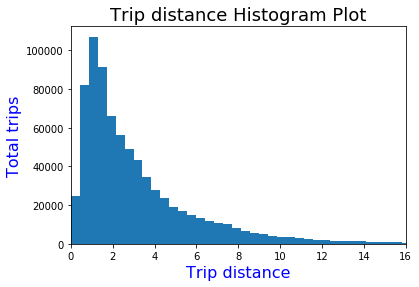

In [145]:
plt.figure()
plt.hist(df['Trip_distance'], bins = 400) 
plt.xlabel('Trip distance', fontsize = 16, color ="b")
plt.ylabel('Total trips', fontsize = 16, color = "b")
plt.title('Trip distance Histogram Plot',fontsize =18)
plt.savefig("figs/Trip_distance_hist.png", dpi = 100)
plt.figure()
plt.hist(df['Trip_distance'], bins = 400) 
plt.xlabel('Trip distance', fontsize = 16, color ="b")
plt.ylabel('Total trips', fontsize = 16, color = "b")
plt.title('Trip distance Histogram Plot',fontsize =18)
plt.savefig("figs/Trip_distance_hist2.png", dpi = 100)
plt.xlim(0,16)
plt.show()

The trip distance varies a lot, but will this parameter influence the tip amount?

Here we want to check if we need to include trip distance as one of the parameter for tip percentage.

In [146]:
distance_by_hour = df.groupby('hour')['Trip_distance'].agg([np.mean, np.median])
distance_by_hour

,mean,median
hour,,
0,3.273554,2.40
1,3.289055,2.42
2,3.388912,2.50
3,3.557267,2.64
4,4.268241,3.02
5,5.267751,3.80
6,5.070727,3.73
7,3.862702,2.69
8,3.367645,2.30


To visually observe the trend, we plot the median and mean average distance as the function of hour of the day.

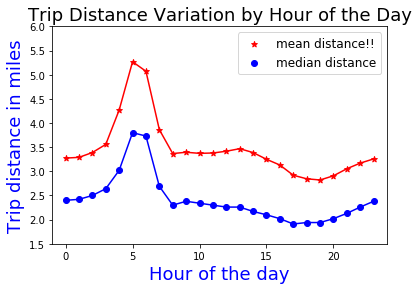

In [147]:
plt.scatter(range(24), distance_by_hour["mean"], c ='r',label = "mean distance!!", marker="*") 
plt.scatter(range(24), distance_by_hour['median'],c ='b',label = "median distance")
plt.plot(distance_by_hour['mean'],c ='r',label = "")
plt.plot(distance_by_hour['median'],c ='b',label = "")
legend = plt.legend(loc='upper right', fontsize='large')
plt.title('Trip Distance Variation by Hour of the Day',fontsize =18)
plt.axis([-1, 24, 1.5, 6])
plt.xlabel('Hour of the day', fontsize = 18, color ="b")
plt.ylabel('Trip distance in miles', fontsize = 18, color = "b")
plt.savefig("figs/by_hour_distance.png", dpi = 100)
plt.show()

From this figure, it seems there is a peak of the average/median travel distance before the morning rushing hour.

Compared with figure in 3.2, it seems that the trip distance is in reversely related with the number of rides in the hour of the day.

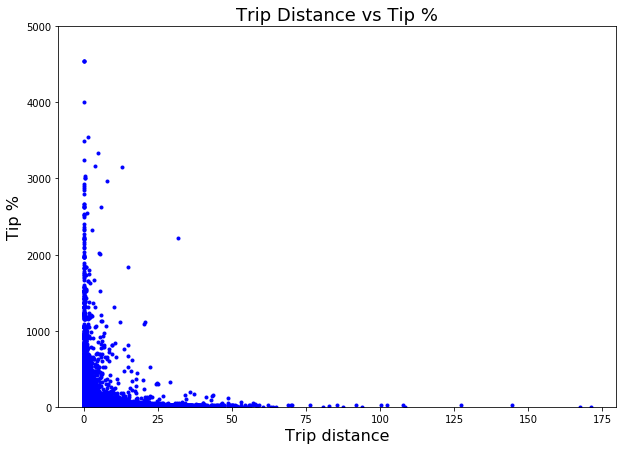

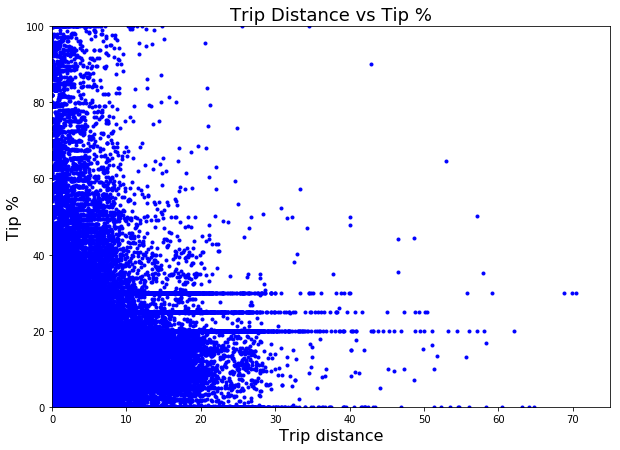

In [148]:
plt.figure(figsize=(10,7))
plt.scatter(df['Trip_distance'], df['Tip_percentage'], color = 'blue',marker='.')
plt.xlabel('Trip distance', fontsize =16)
plt.ylabel('Tip %', fontsize =16)
plt.title('Trip Distance vs Tip %',fontsize =18)
plt.ylim(0,5000)
plt.savefig("figs/tip %_distance.png",dpi = 100)
plt.figure(figsize=(10,7))
plt.scatter(df['Trip_distance'], df['Tip_percentage'], color = 'blue',marker='.')
plt.xlabel('Trip distance', fontsize =16)
plt.ylabel('Tip %', fontsize =16)
plt.title('Trip Distance vs Tip %',fontsize =18)
plt.ylim(0,100)
plt.xlim(0,75)
plt.savefig("figs/tip %_distance2.png",dpi = 100)
plt.show()

Long distance does not mean a likely hood of higher tip %

### 3.4 Pickup/Dropoff location.

In [149]:
df2 = pd.DataFrame(pd.np.random.random(768292))
df_elements = df2.sample(frac=0.02)
df_rest = df2.loc[df2.index.isin(df_elements.index)]

In [150]:
lat = np.array(df["Pickup_latitude"][0:len(df)])
long = np.array(df["Pickup_longitude"][0:len(df)])
data1 = [[lat[i],long[i]] for i in range(len(df_rest))]
map_osm = folium.Map(location=[40.77, -73.84], zoom_start=11)
map_osm.add_child(HeatMap(data=data1, radius=10, gradient={.25: 'blue', .5: 'green', 0.75: 'yellow', 1: 'red'}))
map_osm

In [151]:
lat = np.array(df["Dropoff_latitude"][0:len(df)])
long = np.array(df["Dropoff_longitude"][0:len(df)])
data1 = [[lat[i],long[i]] for i in range(len(df_rest))]
map_osm = folium.Map(location=[40.77, -73.84], zoom_start=11)
map_osm.add_child(HeatMap(data=data1, radius=10, gradient={.25: 'blue', .5: 'green', 0.75: 'yellow', 1: 'red'}))
map_osm

From the heat map, most of the trips are pick up around (but not include) the Manhattan downtown, and dropoff at Manhattan downtown, Brooklyn, and LGA & JFK airports. This is because Green taxis in New York City are only allowed to pick up passengers in outer boroughs (excluding JFK and LGA Airports unless arranged in advance) and in Manhattan above East 96th and West 110th Streets. However, they can drop passengers off anywhere, but will not be able to pick up new passengers out of the above zone. 

This makes us curious whether the passengers will tip more when their destination will be JFK or LGA airport, because they have more luggage and may know that the Green taxi cannot pick up new passengers in the airport.


In [152]:
LGA_taxi = pd.DataFrame()
terminals = ["A", "B", "C", "D"]
colors = ["red",'blue','green','yellow']
LGA = [[40.772562, -73.885640], [40.773893, -73.872204],[40.769722, -73.864659],[40.768702, -73.862036]]  #LGA terminal coordinates
for i in range(len(LGA)):
    temp1 = df[(abs(df["Dropoff_latitude"] - LGA[i][0]) < 0.003) & (abs(df["Dropoff_longitude"] - LGA[i][1]) < 0.002)]
    LGA_taxi = LGA_taxi.append(temp1)

LGA_count = LGA_taxi.shape[0]
LGA_avg_distance = np.mean(LGA_taxi['Trip_distance'])
LGA_avg_tip = np.mean(LGA_taxi['Tip_amount'])
LGA_avg_tip_per = np.mean(LGA_taxi[LGA_taxi['Tip_percentage'] < 1000]['Tip_percentage'])

In [153]:
JFK = [40.646, -73.784]  #JFK terminal coordinates
Dropoff_at_JFK = df[(abs(df["Dropoff_latitude"] - JFK[0]) < 0.008) & (abs(df["Dropoff_longitude"] - JFK[1]) < 0.01)]
JFK_taxi = Dropoff_at_JFK
JFK_count = JFK_taxi.shape[0]
JFK_avg_distance = np.mean(JFK_taxi['Trip_distance'])
JFK_avg_tip = np.mean(JFK_taxi['Tip_amount'])
JFK_avg_tip_per = np.mean(JFK_taxi[JFK_taxi['Tip_percentage'] < 1000]['Tip_percentage'])

In [154]:
NYC_count = df.shape[0]
NYC_avg_distance = np.mean(df['Trip_distance'])
NYC_avg_tip = np.mean(df['Tip_amount'])
NYC_avg_tip_per = np.mean(df[df['Tip_percentage'] < 1000]['Tip_percentage'])

To compare airport taxi data with general city data, we made a bar plots to compare the tips among JFK, LGA and general city traffic.

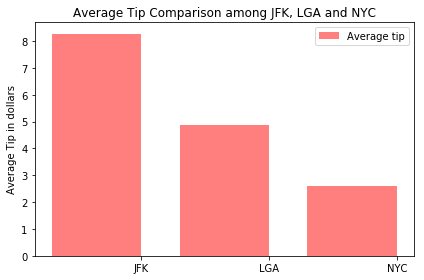

In [155]:
index = np.arange(3)
bar_width = 0.7
opacity = 0.5
rects1 = plt.bar(range(3), (JFK_avg_tip,LGA_avg_tip,NYC_avg_tip), bar_width, alpha=opacity, color='r', label='Average tip')
plt.ylabel('Average Tip in dollars')
plt.title('Average Tip Comparison among JFK, LGA and NYC')
plt.xticks(index + 0.5* bar_width, ('JFK', 'LGA', 'NYC'))
plt.legend()
plt.tight_layout()
plt.savefig("figs/average_tip.png")
plt.show()

The tip amount is JFK > LGA > NYC, probably due to the average trip distance is JFK > LGA > NYC. Since JFK airport is farther away from the city, and most of trips are from area around the Manhattan downtown to the Manhattan/Brooklyn, which is short.

Next we want to check the tip % difference.

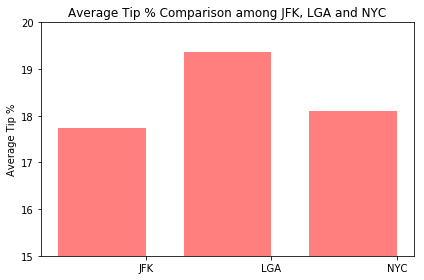

In [156]:
index = np.arange(3)
bar_width = 0.7
opacity = 0.5
rects1 = plt.bar(range(3), (JFK_avg_tip_per,LGA_avg_tip_per,NYC_avg_tip_per), bar_width, alpha=opacity, color='r')
plt.ylabel('Average Tip %')
plt.title('Average Tip % Comparison among JFK, LGA and NYC')
plt.xticks(index + 0.5* bar_width, ('JFK', 'LGA', 'NYC'))
plt.ylim(15, 20)
plt.tight_layout()
plt.savefig("figs/average_tip%.png")
plt.show()

The tip % are all around 18.5 %, which is in agree of our previous found that most of passengers pay 20 % tip, there are slightly difference between locations, and we may investigate it further in the modeling part.

Continuous with last part, we are further wondering the tip % difference at different pick-up and drop-off locations. Here we had drawn two tip percentage heat maps.

We firstly divide the locations into small blocks. Then we calculate the median tip% in different blocks use pandas groupby method. The heat map is derived from the tip% in different locations.

In [157]:
df['pick_lat'] = df['Pickup_latitude'] * 500 // 1 / 500
df['pick_long'] = df['Pickup_longitude'] * 500 // 1 / 500
df['drop_lat'] = df['Dropoff_latitude'] * 500 // 1 / 500
df['drop_long'] = df['Dropoff_longitude'] * 500 // 1 / 500
df.sample(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Trip_type,day,hour,weekday,total_without_tip,Tip_percentage,pick_lat,pick_long,drop_lat,drop_long
517867,2,2015-12-11 02:44:20,2015-12-11 02:57:16,N,1,-73.925659,40.761833,-73.985107,40.757927,1,...,1.0,11,2,4,15.8,25.000000,40.760,-73.926,40.756,-73.986
1049925,1,2015-12-20 01:15:23,2015-12-20 01:27:12,N,1,-73.960228,40.657143,-73.960968,40.684074,1,...,1.0,20,1,6,12.3,19.918699,40.656,-73.962,40.684,-73.962
1325734,2,2015-12-25 17:33:08,2015-12-25 17:44:16,N,1,-73.994469,40.689823,-73.970070,40.689377,1,...,1.0,25,17,4,10.8,9.259259,40.688,-73.996,40.688,-73.972
788912,1,2015-12-15 22:31:06,2015-12-15 22:50:47,N,1,-73.962547,40.709908,-73.967949,40.755505,2,...,1.0,15,22,1,20.8,19.951923,40.708,-73.964,40.754,-73.968
199475,2,2015-12-04 22:45:37,2015-12-04 23:06:42,N,1,-73.942276,40.714706,-73.964371,40.677647,2,...,1.0,4,22,4,18.3,20.000000,40.714,-73.944,40.676,-73.966


#### Pickup location tip heat map 

In [158]:
tip_pick = df[df['Tip_percentage'] <= 100].groupby(['pick_lat', 'pick_long']).median()
tip_pick.sample()

,,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,...,Total_amount,Payment_type,Trip_type,day,hour,weekday,total_without_tip,Tip_percentage,drop_lat,drop_long
pick_lat,pick_long,,,,,,,,,,,,,,,,,,,,,
40.814,-73.82,1.5,1.0,-73.819801,40.814312,-73.924885,40.797541,1.0,14.115,40.75,0.25,...,45.525,1.0,1.0,12.0,5.5,5.0,41.8,12.5,40.797,-73.926


In [159]:
temp = tip_pick['Tip_percentage']
data1 = [[temp.index[i][0], temp.index[i][1], temp[i]] for i in range(len(temp))]
map_osm = folium.Map(location=[40.77, -73.84], zoom_start=11)
map_osm.add_child(HeatMap(data=data1, radius=3, gradient={.07: 'blue', .14: 'green', 0.21: 'yellow', .28: 'red'}))
del temp
map_osm

#### Drop-off location tip heat map 

In [160]:
tip_drop = df[df['Tip_percentage'] <= 100].groupby(['drop_lat', 'drop_long']).median()
temp = tip_drop['Tip_percentage']
temp
data1 = [[temp.index[i][0], temp.index[i][1], temp[i]] for i in range(len(temp))]
map_osm = folium.Map(location=[40.77, -73.84], zoom_start=11)
map_osm.add_child(HeatMap(data=data1, radius=3, gradient={.07: 'blue', .14: 'green', 0.21: 'yellow', .28: 'red'}))
del temp
map_osm

There are some tip% difference in different pickup/drop-off location.

### 3.5 Average speed over the course of a trip

here we want to check if speed influence the tip%. (that is if the passenger is biased against a slow moving cab or is in a hurry)

First we rebuild the data and calculate the average speed (in miles per hour) for each trip.

In [161]:
df['trip_time_in_minutes'] = (df['Lpep_dropoff_datetime']- df['lpep_pickup_datetime']).apply(lambda x: x.total_seconds())/60.0
df['speed'] = df['Trip_distance'] / (df['trip_time_in_minutes']/60.0)
df['speed_round'] = df['speed'] // 5 * 5

The median speed is 12.04 mph


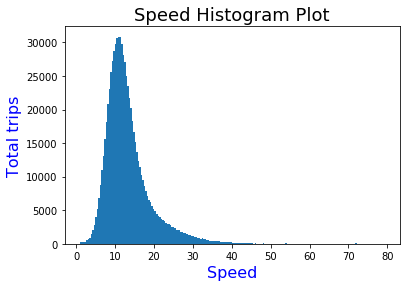

In [162]:
temp = df[(df['speed'] < 80) & (df['speed'] > 1)]
plt.hist(temp['speed'], bins = 200) 
plt.xlabel('Speed', fontsize = 16, color ="b")
plt.ylabel('Total trips', fontsize = 16, color = "b")
plt.title('Speed Histogram Plot',fontsize =18)
plt.savefig("figs/Speed_hist.png", dpi = 100)
median_speed = np.median(temp['speed'])
print("The median speed is %.2f mph" %(median_speed))
del temp

C:\Users\Amartya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


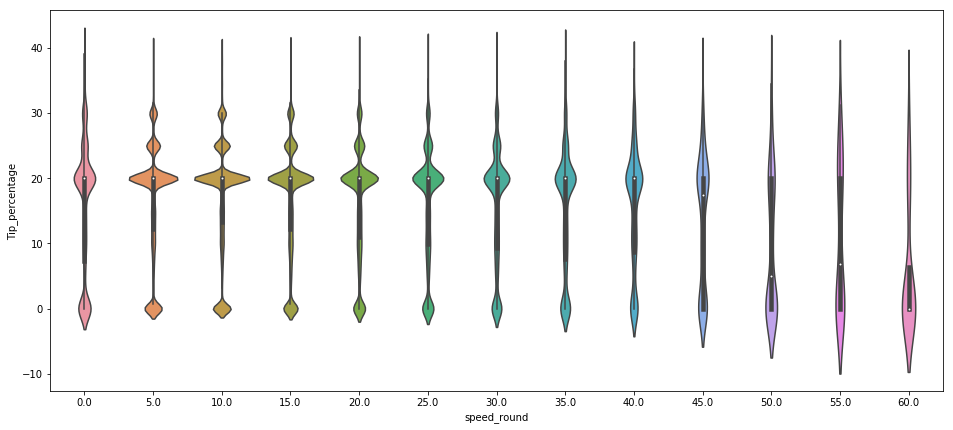

In [163]:
temp = df[(df['speed'] <= 60) & (df['speed'] > 1) & (df['Tip_percentage'] < 40)]
plt.figure(figsize=(16,7))
sns.violinplot(x='speed_round',y='Tip_percentage',data=temp)
plt.savefig("figs/tip%_speed_round.png", dpi = 100)
del temp

The distribution of the tip% do varies at different speed. Interestingly, the higher the speed, the less likelihood that the passenger will pay higher tip. Probably because the higher speed trips normally are long distance and cost higher basic fare.

# 4. Fitting on the raw data 

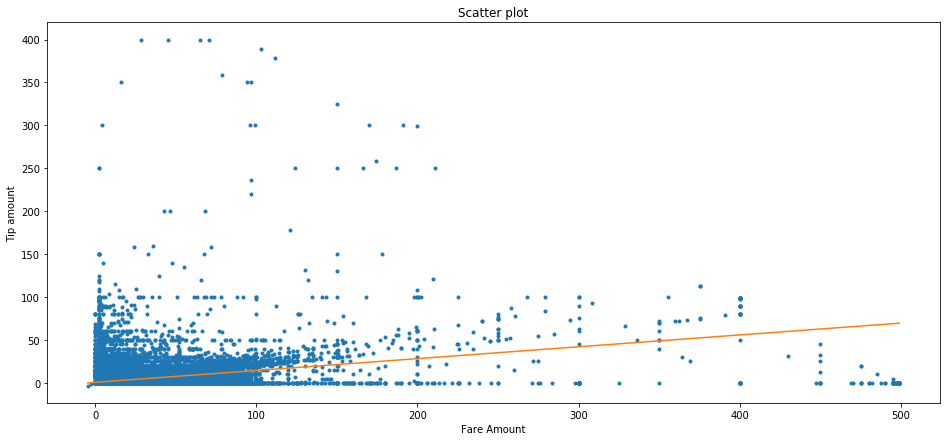

In [164]:
# We plot a scatter plot the data points.
plt.figure(figsize=(16,7))
plt.xlabel("Fare Amount")
plt.ylabel("Tip amount")
plt.title('Scatter plot')
x = df['Fare_amount']
y = df['Tip_amount']
z = np.polyfit(x, y, 1)
f = np.poly1d(z)
sp = np.linspace(x.min(), x.max(), 100)
plt.plot(df['Fare_amount'], df['Tip_amount'], '.')
plt.plot(sp, f(sp))

# 4.1 Residual Plot

C:\Users\Amartya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


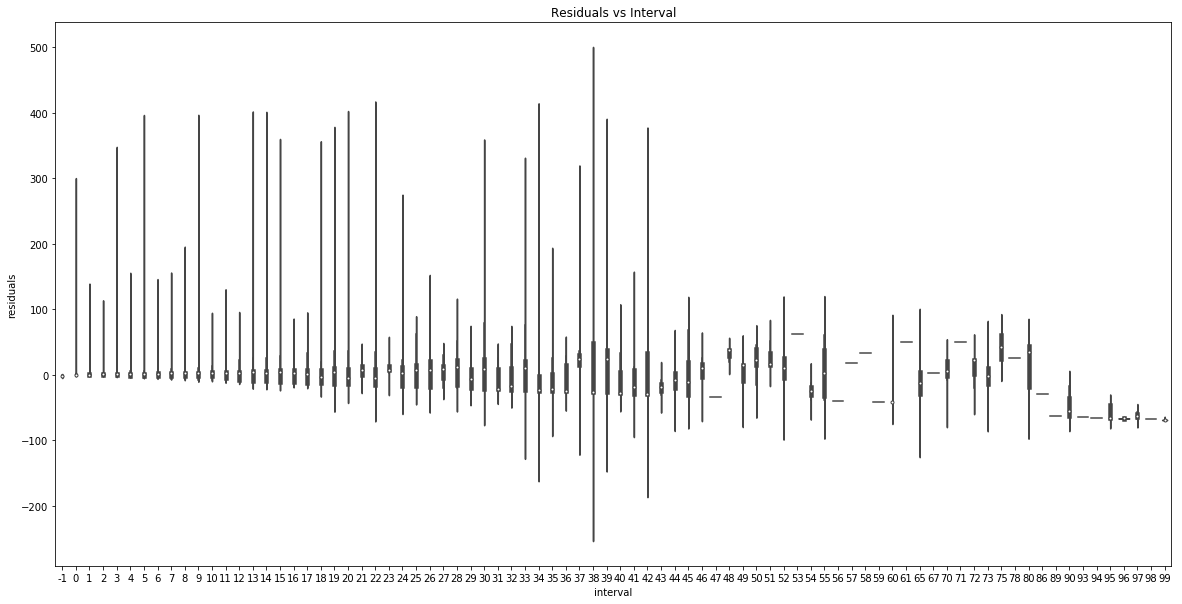

In [165]:
raw = df
plt.figure(figsize=(20,10))
plt.title('Residuals vs Interval')
raw['interval']= (raw['Fare_amount'] // 5)
raw['interval'] = raw['interval'].astype(int)
m = 0.13803501
b = 0.70561424
raw['residuals'] = raw['Tip_amount'] - (raw['Fare_amount']*m+b)
sns.violinplot(x="interval", y="residuals", data=raw)

# 4.2.1 Summary Statistics

In [166]:
import statsmodels.formula.api as sm
npMatrix = np.matrix(df)
X, Y = npMatrix[:,11], npMatrix[:,14]
mdl = LinearRegression().fit(X,Y) 
m = mdl.coef_[0]
b = mdl.intercept_
print ("Linear Regression: y = {0}x + {1}".format(m, b))
res = sm.ols(formula="Tip_amount ~ Fare_amount", data = df).fit()
res.summary()

Linear Regression: y = [0.13803501]x + [0.70561424]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Tip_amount   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                 1.903e+05
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:38:52   Log-Likelihood:            -2.0175e+06
No. Observations:              768292   AIC:                         4.035e+06
Df Residuals:                  768290   BIC:                         4.035e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7056      0.006    121.823      0.000       0.694       0.717
Fare_amount     0.1380      0.000    436.259      0.000       0.137       0.139
==============================================================================
Omnibus:                  2125583.996   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     282271780598.575
Skew:                          34.872   Prob(JB):                         0.00
Kurtosis:                    2971.632   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4.2.2 Cross Validation (10 fold)

In [167]:
score = cross_val_score(mdl, X,Y, cv = 10)

In [168]:
score

array([0.22087836, 0.2272416 , 0.18473124, 0.15973036, 0.21122645,
       0.2156317 , 0.21026865, 0.24068226, 0.16227044, 0.18555471])

In [169]:
np.mean(score)

0.20182157732339784

In [170]:
np.std(score)

0.026005130480584716

# 4.3 Summary

After plotting the scatter plot we can see the summary statistics above. On fitting a linear regression model there are some key features that we can observe. One is that the R-squared Value i.e. Carl Pearson's correlation coefficient is 0.199. Which is very low (there are weak signs of positive correlation). The line of best fit is y = 0.13803501*x + 0.70561424. From Part 4.2.2, we can also see that the mean score of the 10 fold Cross Validation is 0.2018 and the standard deviation is 0.0260. This means that in spite of training on 9 folds of our sample data, a very low accuracy is attained. This means that our linear model does not estimate the raw data well. In the next step of our data analysis we will concentrate around the vicinities of the linear plot. We will try to tidy our data up so that we can exlude any outliers in our data to get a better fit for our linear model.

# 5. Data tidying 

* Since from Section 4, we saw that fitting linear regression model on the raw data resulted in a very bad performance. That means we need to do some extra work before using model to excavate the underlying pattern behind the data. Which is tidying the data

In [171]:
df;

In [172]:
new_t= df[['Fare_amount','Tip_amount', 'Trip_type ', 'Passenger_count']]

* Since the original raw data is around a million, it's infeasible for us to process it. So we choose to shrink the size of samples we need and while keeping the underlying pattern and generosity. 

* The way we choose is using a random sampling method, since it's the random sampling, we maintain the sample underlying pattern after the sampling. Finally, we get the sample size as 50000

In [173]:
new_t= new_t.sample(n= 50000, random_state=1)

* First, we make a scatter plot of the original raw data to see what's wrong with the raw data 

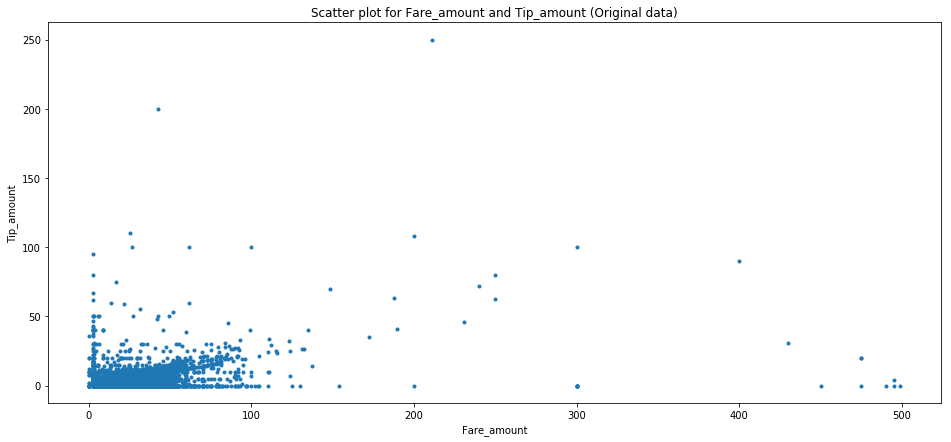

In [174]:
plt.figure(figsize=(16,7))
plt.plot(new_t['Fare_amount'], new_t['Tip_amount'], '.')
plt.xlabel('Fare_amount')
plt.ylabel('Tip_amount')
plt.title('Scatter plot for Fare_amount and Tip_amount (Original data)')
plt.show()

* From the plot, we can see that for each Fare_amount there is a cluster and many outliers far away from the bulk of the data. 

* the second problem is there are so many zero tip for each fare (which is unreasonbale by the common sense), we need to get rid of this part, I used 0.1 quatile range to get rid of 0.1 lowest elements of the whole original data 

In [175]:
q1 = new_t['Tip_amount'].quantile(0.1)
q2 = new_t['Tip_amount'].quantile(1)
res= new_t['Tip_amount'].between(q1, q2, inclusive=False)

In [176]:
new_t= new_t[res]

* I want to get the bulk of data for a Fare_amount, but since the Fare_amount is a decimal number, we cannot do it. So I chose to group all Fare_amount into 5 dollar a range: Use Floor (Fare_amount / 5) -> range index

$$Range\space{}index:\space{}\space{} 0 \space{}\space{}: \space{}[0...5) $$

$$Range\space{}index:\space{}\space{} 1 \space{}\space{}: \space{}[5...10) $$

$$....And\space{}\space{} so\space{}\space{} on\space{} $$

In [177]:
new_t['interval']= (new_t['Fare_amount'] // 5)

* Group data by the inerval index 

In [178]:
intervals= new_t.groupby(['interval'])

* The outlier elimination method I used for each group is interquantile range: 0.25 and 0.75

$$For\space{}each \space{}interval\space{}group:  $$ 

$$if\space{} \space{}0.25 th <\space{}data \space{} <\space{} 0.75 th\space{}\space{} ==>\space{}Pass $$ 

$$else\space{} \space{} ==>\space{}outliers$$

In [179]:
intervals.groups;

In [180]:
low_t= new_t.groupby(['interval'])['interval',"Tip_amount"].quantile(.25)

In [181]:
high_t= new_t.groupby(['interval'])['interval',"Tip_amount"].quantile(.75)

In [182]:
low_t;

In [183]:
high_t;

* Make a new column in original dataset to indicate if a record is not going to be removed 

In [184]:
new_t['not_remove'] = pd.Series( index=new_t.index)

In [185]:
 count= new_t.groupby(['interval']).count()


In [186]:
count;

* But the previous interquatile range solution is of some problems for small size group, for our data, the large interval index range always only with 1 or 2 elements, it can out show the pattern and we also cannot filter it out by quantile range. 

* To account for this problem, we use the count of elements in the group to against this flaw, if n <= 5, since ample is so small for pattern, we just drop group 

In [187]:
 count_5= count['Fare_amount'] <= 5

In [188]:
 count_5;

* Filter using interquantile range 

In [189]:
for i,row in new_t.iterrows(): 
    index= row["Fare_amount"] // 5
    amount= row['Tip_amount'] 
    if amount >= low_t.loc[index, "Tip_amount"] and amount <= high_t.loc[index, "Tip_amount"]: 
        new_t.loc[i,"not_remove"] = True
    else:
        new_t.loc[i,"not_remove"] = False

* Filter using number of elements 

In [190]:
for i,row in new_t.iterrows(): 
    index= row["Fare_amount"] // 5
    if  count_5[index] == True:
        new_t.loc[i,"not_remove"] = False
        
    

In [191]:
new_t;

* The following is the resulting scatter plot after we tidied the data 

In [192]:
new_t= new_t[new_t['not_remove']]

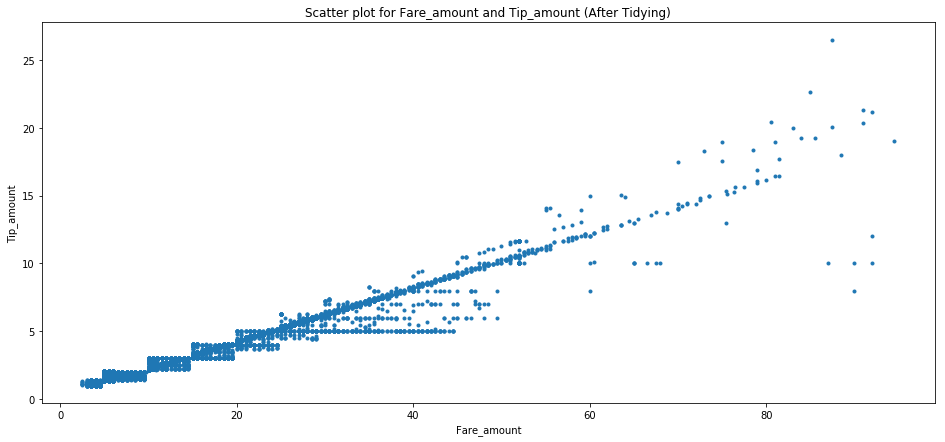

In [193]:
plt.figure(figsize=(16,7))
plt.plot(new_t['Fare_amount'], new_t['Tip_amount'], '.')
plt.xlabel('Fare_amount')
plt.ylabel('Tip_amount')
plt.title('Scatter plot for Fare_amount and Tip_amount (After Tidying)')
plt.show()

* From the Graph we can see that, after we tidied the data, a very strong linear relationship betten tip amount and fare amount finally got revealed 

# 6. Modeling for tip amount 

# 6.1  linear regression model  after cleaning data 

In [194]:
Fare= new_t['Fare_amount'].values

In [195]:
Tips= new_t['Tip_amount'].values

In [196]:
reg = LinearRegression().fit(Fare[: , np.newaxis], Tips[: , np.newaxis])

$$ The \space{} slope \space{} coefficient\space{}: \space{}\space{} \beta1 $$

In [197]:
reg.coef_

array([[0.18838762]])

$$ The \space{} coefficient \space{} of \space{} determinant: \space{}\space{} r^2 $$

In [198]:
reg.score(Fare[: , np.newaxis], Tips[: , np.newaxis])

0.9575941891367766

* r^2 score shows that almost 96% of variation in data can be explained by our linear model, it's almost one, means our model is a very good fit for the data 

In [199]:
x= Fare
y= Tips

In [200]:
z = np.polyfit(x, y, 1)
f = np.poly1d(z)

* now we can plot the fitting curve and data to show the goodness of fit visually 

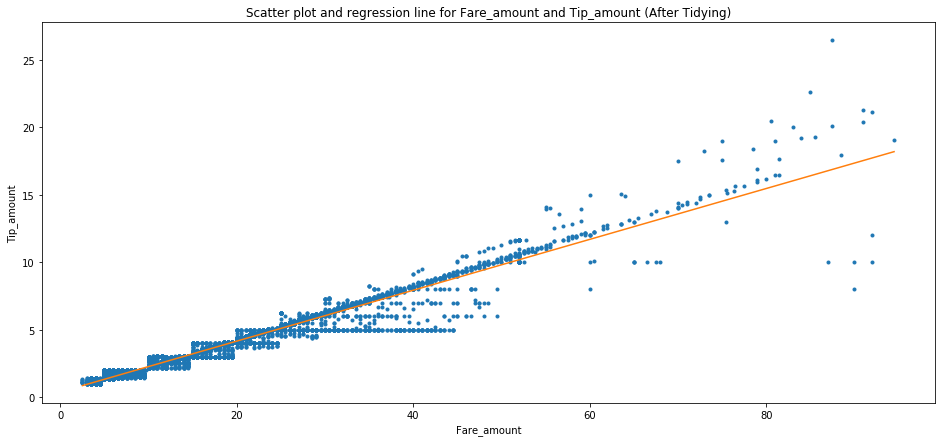

In [201]:
plt.figure(figsize=(16,7))
plt.plot(x, y, '.')
sp = np.linspace(x.min(), x.max(), 100)
plt.plot(sp, f(sp))
plt.xlabel('Fare_amount')
plt.ylabel('Tip_amount')
plt.title('Scatter plot and regression line for Fare_amount and Tip_amount (After Tidying)')
plt.show()

# 6.2 performance Analysis

# 6.2.1 Residual Analysis 

In [202]:
pr_tip= reg.predict(Fare[:,np.newaxis]).flatten()

In [203]:
re_tip= Tips - pr_tip

In [204]:
test= new_t

In [205]:
test['residuals'] = re_tip

C:\Users\Amartya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [206]:
test['interval']= test['interval'].astype(int);

C:\Users\Amartya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


* Since violin plot is for data distribution for a fix point, so we chose interval indices as x axis 

C:\Users\Amartya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


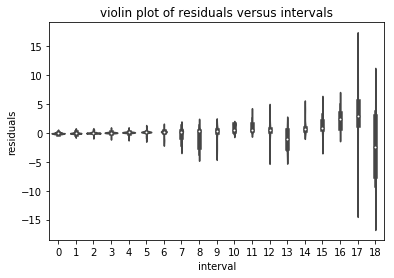

In [207]:
sns.violinplot(x="interval", y="residuals", data=test)
plt.title("violin plot of residuals versus intervals")
plt.show()

* From the above graph, we can see that residuals are almost all followed the theoretical properties: with mean around 0 and follow normal distribution except for very high interval indices (which resulted in inadequate data amount)

# 6.2.2 10-fold cross validation

* We also want to use 10-fold cross validation to test out our model's performance 

In [208]:
score = cross_val_score(reg, x[:,np.newaxis], y, cv=10)

* The mean of the test score 

In [209]:
score.mean()

0.9575322129895065

* the mean shows: the score is very high, is about 96% of prediction accuracy 

* the std of the score 

In [210]:
score.std()

0.005810658582084853

* the std is very low, shows that our model produce a very consistant performance 

# 6.3 Summary of our linear regression model and findings 

(1)  From our model we can see that, after thr tidying data, the performance of our linear regression dramatically increased

(2)  Now linear regression turns out to be a very good model for our data, with very high goodness of fit 

(3) From the slope coefficient we got, which is 0.18, it coincides in common sense we think about the tips and tips for taxi 

(4) Also that slope shows us the typical tip rate in New York for taxi, is also a finding we used our model to find behind the scence of data

# 7 Conslusion 

During this inquiry into the data analysis we faced issues such as missing data (especially missing not at random when the passengers failed to report tips paid to their cab drivers). We realized that the tidying process took the bulk of our effort. to get the good data that fit our model, we had to trim the data as well.
From this project, we also learnt a few things about modeling. One is the importance of tidying data especially for the real life data. During this project, before we tidied the data, we tried linear regresson mode, but it turned out to be a very bad fit. After we tidied the data, the model is still the same linear regressoin model, however the goodness of fit prominently incereased, since we can see that in the real life data, there are always some noise (outliers) that can cover the underlying pattern of the data, before we use model to investigate the underlying pattern we need to cleanse the dataset first. Second is applying model is actually extracting the underlying pattern of the dataset, for this project, we can see that after use model, we get the slope, which is corresponding to the typical taxi tip in NY city, we got this pattern off a dataset by using that linear model. 
Overall, we were able to successfully explore the world of data from the perspective of an everyday Boro cab driver. We looked at different features ranging from trip time and distance travelled and its effects on tips. An hypothesis test on whether the time of the day effects the tip % for a cab driver was also be carried out. Lastly, we observed that the tip % was observed to be approximately 18% after fitting it on a linear model.